

---



# Rain in Austrlia

##### En Primer lugar importamos las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer



---



#![](https://gostudyaus.es/wp-content/uploads/2019/05/SP_MAP-CLIMATE-AUSTRALIA-1024x720.jpg)



---



###Cargamos el dataset a utilizar, en este caso clima austral

In [ ]:
df= pd.read_csv('weatherAUS.csv')

###Como grupo nos basaremos en la metodología CRIP-DM que desarrollaremos a continuación.
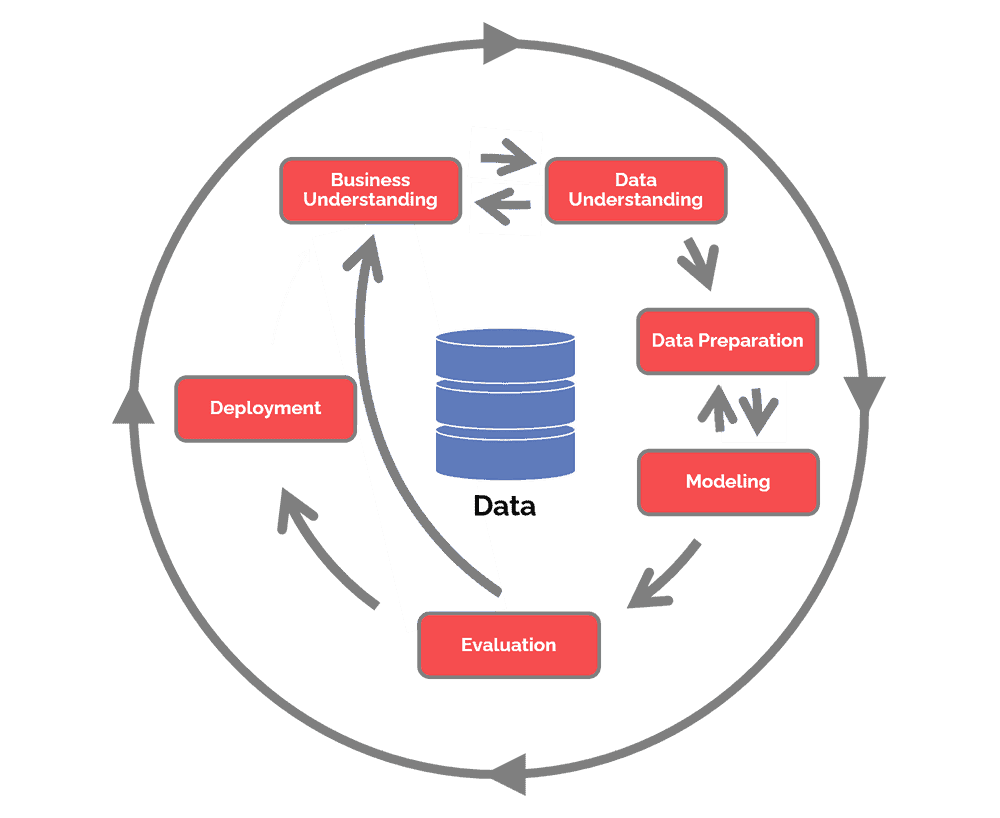

###Para comenzar deberemos comprender la data (Data Understanding).
###El dataset entregado registra el clima de australia, este contiene registros diarios del clima entre los años 2007 y 2017 dentro del los distintos estados del país.

In [ ]:
df.Date.min()

'2007-11-01'

In [ ]:
df.Date.max()

'2017-06-25'

In [ ]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9670,2011-01-15,CoffsHarbour,19.5,27.1,0.0,5.4,10.7,NE,35.0,N,...,67.0,1009.9,1007.9,7.0,4.0,24.6,26.0,No,0.0,No
41484,2009-03-29,Wollongong,17.6,24.0,0.0,NaN,NaN,N,33.0,NE,...,72.0,1023.0,1021.2,NaN,NaN,20.8,22.9,No,0.0,No
90947,2009-04-04,Townsville,20.6,31.7,0.0,6.2,10.7,NE,31.0,E,...,60.0,1013.1,1009.9,4.0,2.0,28.6,30.3,No,0.0,No
9789,2011-06-13,CoffsHarbour,12.6,18.2,103.4,NaN,0.2,WSW,48.0,SW,...,83.0,1016.8,1014.2,8.0,7.0,15.0,14.9,Yes,127.6,Yes
125550,2014-04-22,Walpole,8.7,20.0,0.0,NaN,NaN,NNW,33.0,NNW,...,55.0,1020.9,1018.2,NaN,NaN,13.9,18.4,No,0.0,No
55967,2015-06-20,Ballarat,-0.4,8.5,0.6,NaN,NaN,S,30.0,SSE,...,75.0,1027.5,1026.7,4.0,7.0,4.0,8.2,No,0.2,No
7683,2014-01-14,Cobar,25.7,39.6,0.0,12.8,NaN,NE,43.0,NE,...,12.0,1016.5,1013.8,0.0,1.0,30.8,38.1,No,0.0,No
96953,2008-12-08,MountGambier,11.1,21.0,0.0,4.0,9.4,SSW,35.0,WNW,...,42.0,1015.3,1011.0,7.0,6.0,13.9,20.4,No,0.4,No
9086,2009-06-10,CoffsHarbour,6.4,18.9,0.0,1.8,9.5,NaN,NaN,NW,...,26.0,1015.0,1012.3,1.0,1.0,14.4,18.0,No,0.0,No
17052,2015-09-02,Newcastle,6.0,20.5,0.0,NaN,NaN,NaN,NaN,NW,...,NaN,NaN,NaN,4.0,NaN,15.0,NaN,No,3.0,Yes


In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

#### Las variables presentes en el dataset son las siguientes
* Date :
La fecha en que realizo el registro

* Location :
El estado en que fue tomado el registro

* MinTemp :
Temperatura minima registrada en grados Celsius

* MaxTemp :
Temperatura maxima registrada en grados Celsiuss

* Rainfall :
La Cantidad de agua caida durante el dia en mm

* Evaporation :
The so-called Class A pan evaporation (mm) in the 24 hours to 9am

* Sunshine :
La cantidad de horas que durante el dia hubo sol.

* WindGustDir :
Direccion de viento mas fuerte en las 24 horas anteriores a medianoche

* WindGustSpeed :
La velocidad (km/h) de viento mas fuerte en las 24 horas anteriores a medianoche

* WindDir9am :
Dirección del viento a las 9 am

* WindDir3pm :
Dirección del viento a las 3 pm

* WindSpeed9am :
Velocidad del viento a las 9 am

* WindSpeed3pm :
Velocidad del viento a las 3 pm

* Humidity9am :
Humedad en % presente a las 9 am

* Humidity3pm :
Humedad en % presente a las 3 pm

* Pressure9am :
Presion atmosferica presente a las 9 am
     float64
* Pressure3pm :
Presion atmosferica presente a las 3 pm

* Cloud9am :
Fraccion de cielo oscurecido por nubes a las 9 am. (0  indica cielo despejado y 8 indica cielo totalmente nublado)

* Cloud3pm :
Fraccion de cielo oscurecido por nubes a las 3 pm. (0  indica cielo despejado y 8 indica cielo totalmente nublado)

* Temp9am :
Temperatura en grados celsius registrada a las 9 am

* Temp3pm
Temperatura en grados celsius registrada a las 3 pm

* RainToday
Se registró lluvia durante el día

* RainTomorrow
Se registró lluvia al día siguiente

###Seleccionamos los estados federales correspondientes al clima Tropical para comenzar a trabajar con ellos.


In [ ]:
valores = ['Port Warrender','Wyndham','Darwin','Katherine','Cooktown','Cairns','Townsville']
Df = df[df['Location'].isin(valores)]
Df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
92678,2014-03-30,Townsville,24.7,30.2,0.0,6.0,10.0,ENE,33.0,SE,...,69.0,1015.6,1013.0,6.0,2.0,27.2,29.6,No,0.0,No
91986,2012-03-09,Townsville,24.1,30.6,2.6,1.6,1.8,NE,33.0,ESE,...,64.0,1011.3,1008.7,7.0,7.0,25.9,30.0,Yes,0.0,No
87693,2017-01-27,Cairns,23.4,33.5,6.4,NaN,NaN,E,37.0,S,...,53.0,1010.4,1008.0,NaN,1.0,29.5,33.1,Yes,0.0,No
137306,2012-05-16,Darwin,20.1,30.0,0.0,7.2,5.5,SE,39.0,SE,...,35.0,1013.7,1009.6,7.0,6.0,21.8,29.3,No,0.0,No
140120,2015-12-09,Katherine,23.0,36.0,34.0,NaN,NaN,NNE,35.0,NW,...,NaN,1013.6,1009.6,6.0,NaN,29.0,NaN,Yes,0.0,No
138347,2015-05-21,Darwin,22.9,32.3,0.0,4.0,10.9,NNW,31.0,NE,...,64.0,1016.2,1012.9,1.0,3.0,28.1,30.5,No,0.0,No
92210,2012-10-19,Townsville,17.9,29.5,0.0,9.4,11.7,ENE,48.0,ESE,...,53.0,1017.5,1014.8,3.0,1.0,26.8,27.0,No,0.0,No
140650,2017-06-02,Katherine,16.6,30.0,0.0,8.0,NaN,SE,44.0,SE,...,NaN,1017.8,1014.2,3.0,NaN,23.0,NaN,No,0.0,No
86786,2014-06-15,Cairns,19.7,21.5,0.2,3.6,0.0,SSE,35.0,S,...,80.0,1016.3,1014.2,8.0,8.0,20.6,19.2,No,1.0,No
139635,2014-08-10,Katherine,12.5,31.1,0.0,8.0,NaN,ESE,44.0,ESE,...,26.0,1018.4,1014.1,0.0,0.0,26.6,30.4,No,0.0,No


In [ ]:
#En el siguiente código podemos visualizar que la columna Date se transforma a una variable de tipo fecha
Df['Date'] = pd.to_datetime(Df['Date'])

<ipython-input-9-02e279a3033b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Date'] = pd.to_datetime(Df['Date'])


###En este apartado comenzaremos con la siguiente etapa de CRISP-DM, la preparación de la data (DATA PREPARATION). Comenzamos con la columna Date que es de tipo Object, la cual deberemos transformar a tipo fecha.

In [ ]:
#Una vez trasnformada a fecha la columna Date, podemos proceder a separarlos por día, mes y año. De forma continua eliminamos la columna Date ya que hemos separado lo antes mencionado.
Df['Day']= Df['Date'].dt.day
Df['Month']= Df['Date'].dt.month 
Df['Year']= Df['Date'].dt.year 
DF = Df.drop(['Date'],axis=1)

<ipython-input-10-7fa25959d71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Day']= Df['Date'].dt.day
<ipython-input-10-7fa25959d71f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Month']= Df['Date'].dt.month
<ipython-input-10-7fa25959d71f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

###Una vez realizado la separación de Date, realizamos un sample para visualizar que el codigo anterior funcionó. A continuación vemos que ya no existe Date como columna, si no que existe en su reemplazo, las columnas: DAY, MONTH, YEAR.

In [ ]:
DF.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
86434,Cairns,15.8,26.4,0.0,4.0,6.8,ENE,30.0,SE,ENE,...,1.0,5.0,21.0,23.8,No,0.0,No,27,6,2013
136747,Darwin,26.2,35.6,0.0,8.2,10.6,SW,39.0,ENE,NNW,...,2.0,7.0,30.7,33.9,No,0.0,No,5,10,2010
90842,Townsville,26.6,33.5,0.0,4.4,10.3,ESE,37.0,NNE,N,...,7.0,6.0,31.4,31.8,No,0.2,No,20,12,2008
91998,Townsville,25.9,30.9,6.4,4.2,10.3,N,52.0,NNW,N,...,7.0,4.0,28.9,30.6,Yes,0.0,No,21,3,2012
86144,Cairns,20.0,27.8,0.0,5.8,3.5,E,26.0,SE,NNE,...,7.0,7.0,22.8,26.4,No,0.8,No,13,7,2012


In [ ]:
#Visualizamos la cantidad de filas y columnas que se encuentran en el dataset
DF.shape

(10772, 26)

In [ ]:
#Verificamos la cantidad de nulos por columnas
DF.isnull().sum()

Location            0
MinTemp            48
MaxTemp            22
Rainfall           44
Evaporation       570
Sunshine         2405
WindGustDir       113
WindGustSpeed     108
WindDir9am        233
WindDir3pm         26
WindSpeed9am        5
WindSpeed3pm       10
Humidity9am        78
Humidity3pm       824
Pressure9am         2
Pressure3pm         7
Cloud9am          395
Cloud3pm         1193
Temp9am            38
Temp3pm           712
RainToday          44
RISK_MM             0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

### Tratamiento de datos nulos

En el caso de los nulos existentes, decidimos optar por tratar estos con la tecnica de imputar valores a partir de la tecnica de vecinos cercanos

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")

#Imputamos los missing values
imputer.fit(DF[["Sunshine"]])
DF["Sunshine"] = imputer.transform(DF[["Sunshine"]]).ravel()

imputer.fit(DF[["Cloud3pm"]])
DF["Cloud3pm"] = imputer.transform(DF[["Cloud3pm"]]).ravel()

imputer.fit(DF[["Evaporation"]])
DF["Evaporation"] = imputer.transform(DF[["Evaporation"]]).ravel()

imputer.fit(DF[["Cloud9am"]])
DF["Cloud9am"] = imputer.transform(DF[["Cloud9am"]]).ravel()

imputer.fit(DF[["Pressure9am"]])
DF["Pressure9am"] = imputer.transform(DF[["Pressure9am"]]).ravel()

imputer.fit(DF[["Pressure3pm"]])
DF["Pressure3pm"] = imputer.transform(DF[["Pressure3pm"]]).ravel()

imputer.fit(DF[["WindSpeed9am"]])
DF["WindSpeed9am"] = imputer.transform(DF[["WindSpeed9am"]]).ravel()

imputer.fit(DF[["WindSpeed3pm"]])
DF["WindSpeed3pm"] = imputer.transform(DF[["WindSpeed3pm"]]).ravel()

imputer.fit(DF[["WindGustSpeed"]])
DF["WindGustSpeed"] = imputer.transform(DF[["WindGustSpeed"]]).ravel()

imputer.fit(DF[["MinTemp"]])
DF["MinTemp"] = imputer.transform(DF[["MinTemp"]]).ravel()

imputer.fit(DF[["Rainfall"]])
DF["Rainfall"] = imputer.transform(DF[["Rainfall"]]).ravel()

imputer.fit(DF[["Temp3pm"]])
DF["Temp3pm"] = imputer.transform(DF[["Temp3pm"]]).ravel()

imputer.fit(DF[["Temp9am"]])
DF["Temp9am"] = imputer.transform(DF[["Temp9am"]]).ravel()

imputer.fit(DF[["Humidity3pm"]])
DF["Humidity3pm"] = imputer.transform(DF[["Humidity3pm"]]).ravel()

imputer.fit(DF[["Humidity9am"]])
DF["Humidity9am"] = imputer.transform(DF[["Humidity9am"]]).ravel()


In [ ]:
DF.WindDir9am.describe()

count     10539
unique       16
top         SSE
freq       1853
Name: WindDir9am, dtype: object

In [ ]:
DF.WindGustDir.describe()

count     10659
unique       16
top         ENE
freq       1614
Name: WindGustDir, dtype: object

En el caso de las variables 'WindDir9am' y 'WindGustDir', les imputaremos los resultados mas repetidos, es decir, por la moda de cada variable

In [ ]:
DF['WindDir9am'].fillna('SSE', inplace=True)
DF['WindGustDir'].fillna('ENE', inplace=True)

In [ ]:
DF.isnull().sum()

Location          0
MinTemp           0
MaxTemp          22
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm       26
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday        44
RISK_MM           0
RainTomorrow      0
Day               0
Month             0
Year              0
dtype: int64

###Una vez imputados los datos, podemos visualizar que la cantidad de datos nulos ha bajado considerablemente.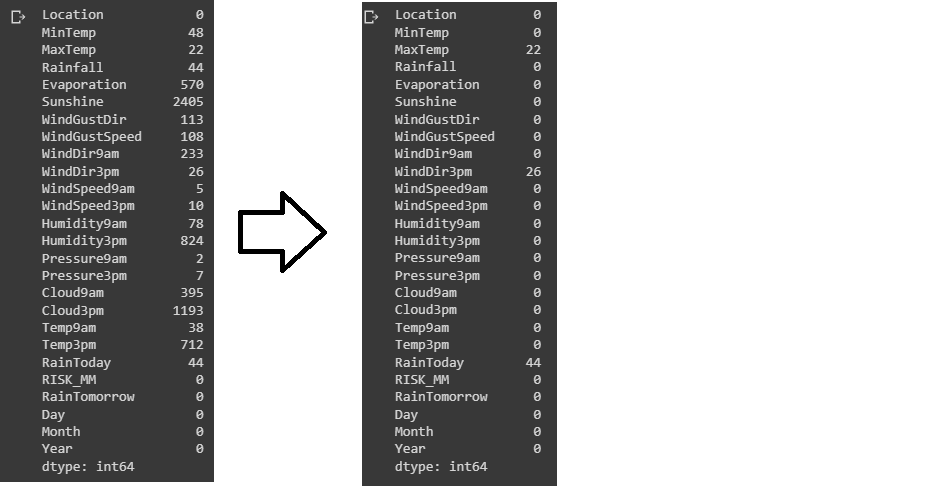

###Aún tenemos datos nulos pero es una minoría de datos, por lo tanto optamos por eliminar estos datos nulos para que nuestro dataset quede limpio.

In [ ]:
DF1= DF.dropna()

In [ ]:
DF1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

###Podemos apreciar que ya no existen datos nulos.

In [ ]:
DF1.sample(4)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
136838,Darwin,23.6,32.0,39.2,5.2,7.8,NNW,35.0,NW,NW,...,6.0,7.0,29.4,31.6,Yes,0.2,No,4,1,2011
86143,Cairns,21.7,29.8,0.0,3.4,9.7,S,31.0,SSE,ENE,...,1.0,1.0,24.5,29.3,No,0.0,No,12,7,2012
86771,Cairns,20.5,26.7,1.6,3.0,4.9,ESE,41.0,S,SSE,...,7.0,6.0,23.2,26.6,Yes,0.8,No,31,5,2014
137798,Darwin,23.9,33.3,9.8,7.8,10.1,S,39.0,W,SW,...,3.0,7.0,30.9,29.2,Yes,26.4,Yes,18,11,2013


###Verificamos que no existan datos duplicados

In [ ]:
DF1.duplicated().sum()

0

###Para poder continuar con nuestra preparación de la data debemos encodear los datos a números, de lo contrario no podemos avanzar.

In [ ]:
#Encodeamos los datos a numero, para poder continuar
label_encoder = preprocessing.LabelEncoder()
DF1['RainToday'] = label_encoder.fit_transform(DF1['RainToday'])
DF1['RainTomorrow'] = label_encoder.fit_transform(DF1['RainTomorrow'])
DF1['WindGustDir'] = label_encoder.fit_transform(DF1['WindGustDir'])
DF1['WindDir9am'] = label_encoder.fit_transform(DF1['WindDir9am'])
DF1['WindDir3pm'] = label_encoder.fit_transform(DF1['WindDir3pm'])
DF1['RainToday'].unique()

<ipython-input-23-40d914f1e21a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['RainToday'] = label_encoder.fit_transform(DF1['RainToday'])
<ipython-input-23-40d914f1e21a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['RainTomorrow'] = label_encoder.fit_transform(DF1['RainTomorrow'])
<ipython-input-23-40d914f1e21a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([0, 1])

In [ ]:
#Contamos la cantidad de datos de cada estado federal que corresponde al clima Tropical
DF1.Location.value_counts()

Darwin        3189
Townsville    3026
Cairns        2960
Katherine     1505
Name: Location, dtype: int64

#### Selección del estado más representativo

En nuestro caso el estado mas representativo dentro del clima Tropical que presenta mas registros es el estado federal **'Darwin'** 

In [ ]:
DfD = DF1.loc[DF1['Location'] == 'Darwin' ]

In [ ]:
#Cantidad de datos del estado más representativo
DfD.Location.value_counts()

Darwin    3189
Name: Location, dtype: int64

In [ ]:
DF2 = DfD.drop(['Location'],axis=1)

#Exportamos el dataset a csv, para realizar test de anova
DF2.to_csv('TropicalWeatherAus.csv')

###En este apartado comenzamos con el modelamiento de la data (MODELING)

A continuación podemos ver el resultado del Test de Anova realizado en Rstudio. Esto se realiza para continuar con el modelado de la data.

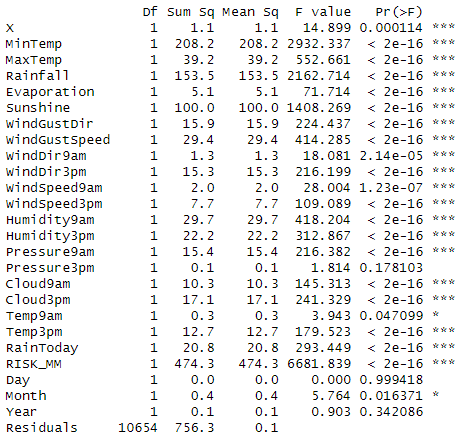

#### Además adjuntamos un mapa de calor para identificar cuales variables tienen correlación

<ipython-input-28-2bcb4b75f003>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.462997  0.052987    -0.150438 -0.338044   
MaxTemp        0.462997  1.000000 -0.302494     0.140203  0.406540   
Rainfall       0.052987 -0.302494  1.000000     0.002488 -0.446138   
Evaporation   -0.150438  0.140203  0.002488     1.000000  0.259721   
Sunshine      -0.338044  0.406540 -0.446138     0.259721  1.000000   
WindGustDir    0.354512 -0.051576  0.186896    -0.114013 -0.277446   
WindGustSpeed  0.007739 -0.125374  0.306761     0.145708 -0.237045   
WindDir9am     0.206930 -0.059430  0.131178    -0.010488 -0.217264   
WindDir3pm     0.289299 -0.015212  0.139942    -0.098037 -0.227815   
WindSpeed9am  -0.174724 -0.263441  0.073148     0.149715  0.013227   
WindSpeed3pm   0.156218  0.168640  0.038257     0.130218  0.127703   
Humidity9am    0.524879  0.016655  0.362375    -0.389173 -0.552297   
Humidity3pm    0.608375 -0.122311  0.368309    -0.345021 -0.678093   
Pressure9am   -0.608

<Axes: >

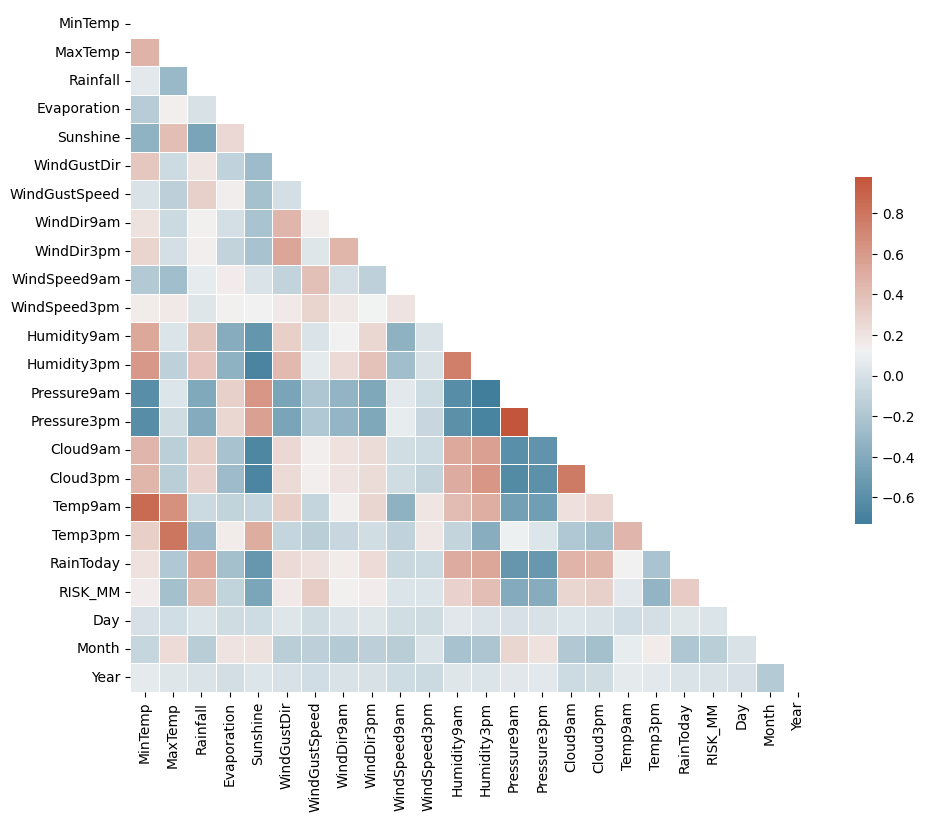

In [ ]:
corr = DF2.set_index('RainTomorrow').corr()
print(corr)

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Mapa de calor con el Mask correcto
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Outliers, aquellos datos que se encuentran muy alejados de la concentración de datos. Aplicaremos BoxPLOT para visualizarlo.

Mediante este grafico de cajas, podemos apreciar como esta la distribucion y la tendencia central de los valores de cada variable

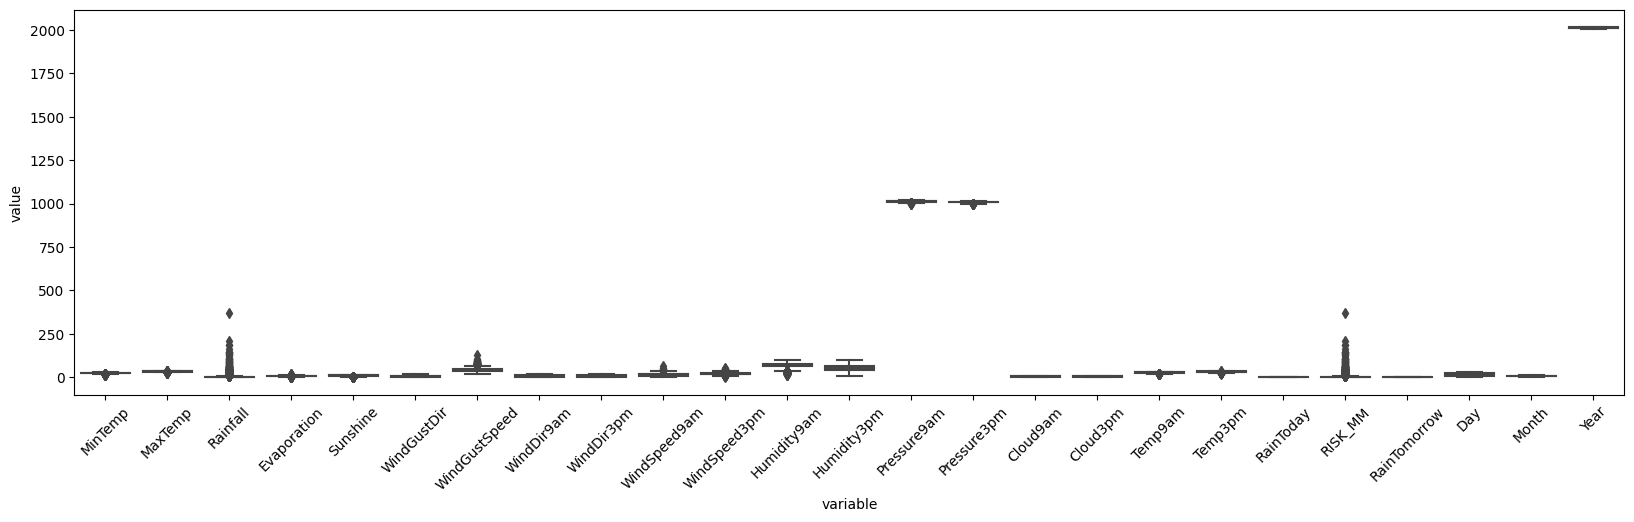

In [ ]:
plt.figure(figsize=(20,5))
gf= sns.boxplot(x="variable", y="value", data=pd.melt(DF2))
gf.tick_params(axis='x', rotation=45)
plt.show()

Para el tratamiento de outliers, decidimos reemplazar los outliers por valores que sean mas representativos. En este ejemplo remplazamos los valores que esten sobre el limite inferior(percentil 5) y bajo el limite superior(percentil 95) por la media correspondiente de cada columna.

se calculan los percentiles del 5% y del 95% respectivamente. Estos valores se utilizan como límites inferior y superior para identificar los outliers en los datos.

In [ ]:
lower_limit = DF2.quantile(0.05)
upper_limit = DF2.quantile(0.95)

# Reemplazar los outliers por valores representativos (media en este ejemplo)
DFnorm = DF2.copy()
DFnorm = DFnorm.where((DFnorm >= lower_limit) & (DFnorm <= upper_limit), DF2.mean(),axis=1)

##### Una vez ya realizado el procedimiento, volvemos a desplegar el grafico para visualizar los cambios.

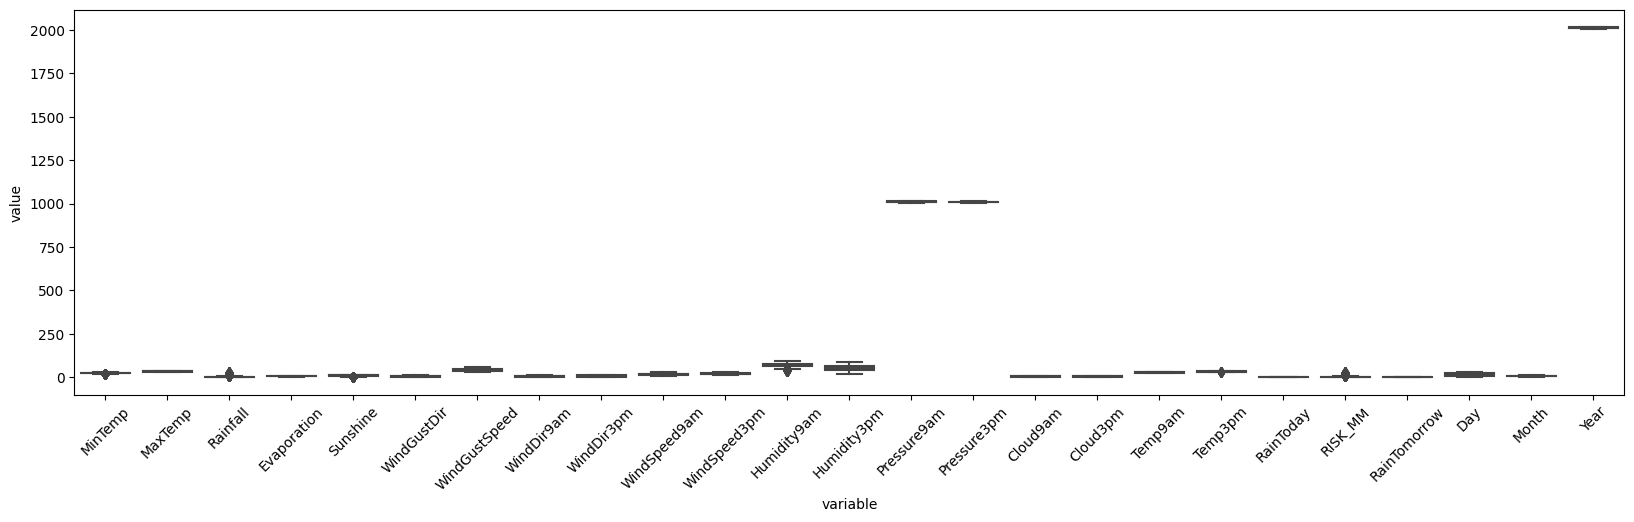

In [ ]:
plt.figure(figsize=(20,5))
gf= sns.boxplot(x="variable", y="value", data=pd.melt(DFnorm))
gf.tick_params(axis='x', rotation=45)
plt.show()

#### Aqui ya podemos apreciar que no existen outliers, es decir, nuestro dataset se encuentra normalizado




Procedemos nuevamente a realizar un Test de Anova con el dataset ya normalizado, para evidenciar si se mantienen nuestras variables predictoras o debemos agregar de mas

In [ ]:
#Exportamos el dataset a csv, para realizar test de anova
DFnorm.to_csv('WeatherAusNORM.csv')

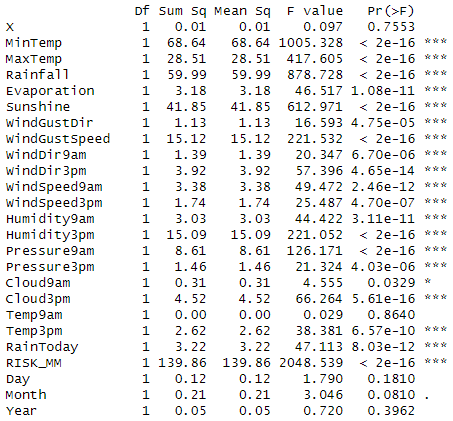

### Predicción. Para comenzar importamos las librerias necesarias para los modelos de clasificación.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
#En esta ocasión realizamos un sample al dataframe de manera trasnpuesta para lograr visualizar todas las columnas que existen
DF2.sample(5).T

,138867,136274,136548,138298,137493
MinTemp,24.0,16.2,25.0,23.7,25.7
MaxTemp,26.7,28.4,32.7,32.5,33.3
Rainfall,23.6,0.0,9.0,8.4,0.0
Evaporation,9.2,7.2,6.2,4.6,4.0
Sunshine,0.0,10.5,4.0,10.9,8.3
WindGustDir,1.0,9.0,1.0,10.0,14.0
WindGustSpeed,41.0,33.0,30.0,31.0,31.0
WindDir9am,0.0,9.0,1.0,14.0,14.0
WindDir3pm,9.0,7.0,14.0,6.0,7.0
WindSpeed9am,24.0,26.0,20.0,2.0,13.0


###Crearemos un nuevo dataframe para ingresar las variables que el test de Anova nos identifica como las que tienen una mayor correlación para luego generar el modelo predictivo.

In [ ]:
DFP = DFnorm[['RainTomorrow','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
           'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 
           'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud3pm', 'Temp3pm','RainToday', 'RISK_MM',
           'Day','Month','Year']]

In [ ]:
X= np.array(DFP.drop(['RainTomorrow'],1)) # Datos numericos -categorias
y = np.array(DFP['RainTomorrow'])# Datos no numericos Etiquetas - condicion

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print('Son {} datos para entrenamiento y {} datos de prueba'.format(X_train.shape[0],X_test.shape[0]))
algoritmoLR= LogisticRegression()
algoritmoLR.fit(X_train, y_train)
Y_pred=algoritmoLR.predict(X_test)
print('Precisión Regresión Logistica: {}'.format(algoritmoLR.score(X_train,y_train)))

Son 2232 datos para entrenamiento y 957 datos de prueba
Precisión Regresión Logistica: 0.9955197132616488


<ipython-input-36-af02948f9c32>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= np.array(DFP.drop(['RainTomorrow'],1)) # Datos numericos -categorias
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
DF2.shape

(3189, 25)

###En este apartado nos encontramos con la etapa de modelo (MODELING), a continuacion podemos ver 3 modelos, un "Decision Tree Classifier", "Support Vector Classifier" y un "Kneighbors Classifier" 

###Metodo de clasificación DECISIONTREECLASSIFIER

In [ ]:
algoritmoDT= DecisionTreeClassifier()
algoritmoDT.fit(X_train, y_train)
Y_pred=algoritmoDT.predict(X_test)
print('Precisión Decision Tree Classifier: {}'.format(algoritmoDT.score(X_train,y_train)))

Precisión Decision Tree Classifier: 1.0


###Metodo de clasificación SVC (Support Vector Classifier)

In [ ]:
algoritmoSVC= SVC()
algoritmoSVC.fit(X_train, y_train)
Y_pred=algoritmoSVC.predict(X_test)
print('Precisión SVC: {}'.format(algoritmoSVC.score(X_train,y_train)))

Precisión SVC: 0.7293906810035843


###Metodo de clasificación de KNEIGHBORSCLASSIFIER (vecinos cercanos)

In [ ]:
algoritmoSNK= KNeighborsClassifier()
algoritmoSNK.fit(X_train, y_train)
Y_pred=algoritmoSNK.predict(X_test)
print('Precisión KNeighborsClassifier: {}'.format(algoritmoSNK.score(X_train,y_train)))

Precisión KNeighborsClassifier: 0.9310035842293907


###En este apartado comenzaremos con la etapa de evaluacion de la data (EVALUATION). Con el fin de determinar que metodo de clasificación es el mejor.

###En este caso podemos determinar que el **DECISION TREE CLASSIFIER** tiene una puntación de 1.0, a diferencia de los otros dos metodos de clasificación que dan una puntación de 0.73 para el SVC y una puntación de 0.93 para KNEIGHBORSCLASSIFIER.
###Por último, llegamos a la etapa de desplegar los resultados (DEPLOYMENT), probaremos si nuestro modelo puede predecir.

In [ ]:
DFP.sample(3).T

,136356,138044,136008
RainTomorrow,1.0,0.0,0.000000
MinTemp,25.7,17.7,22.900000
MaxTemp,32.4,31.6,34.300000
Rainfall,0.0,0.0,0.000000
Evaporation,6.2,5.4,6.324873
Sunshine,8.9,10.7,10.500000
WindGustDir,1.0,2.0,6.000000
WindGustSpeed,37.0,41.0,37.000000
WindDir9am,5.0,0.0,1.000000
WindDir3pm,7.0,2.0,6.000000


In [ ]:
#'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir','WindGustSpeed', 
#'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm', 
#'Pressure9am', 'Pressure3pm','Cloud3pm', 'Temp3pm','RainToday', 'RISK_MM','Day','Month','Year'

mn=float(input('Ingrese MinTemp: '))
mx=float(input('Ingrese MaxTemp: '))
rf=float(input('Ingrese Rainfall: '))
ev=float(input('Ingrese Evaporation: '))
s=float(input('Ingrese Sunshine: '))
wd=float(input('Ingrese WindGustDir: '))
ws=float(input('Ingrese WindGustSpeed: '))
w9=float(input('Ingrese WindDir9am: '))
w3=float(input('Ingrese WindDir3pm: '))
ws9=float(input('Ingrese WindSpeed9am: '))
ws3=float(input('Ingrese WindSpeed3pm: '))
h9=float(input('Ingrese Humidity9am: '))
h3=float(input('Ingrese Humidity3pm: '))
p9=float(input('Ingrese Pressure9am: '))
p3=float(input('Ingrese Pressure3pm: '))
c3=float(input('Ingrese Cloud3pm: '))
t3=float(input('Ingrese Temp3pm: '))
rt=float(input('Ingrese RainToday: '))
rm=float(input('Ingrese RISK_MM: '))
d=float(input('Ingrese dia: '))
m=float(input('Ingrese mes: '))
y=float(input('Ingrese annio: '))

#X_train, y_train
Algoritmo= DecisionTreeClassifier()
Algoritmo.fit(X_train, y_train)
resp = Algoritmo.predict([[mn,mx,rf,ev,s,wd,ws,w9,w3,ws9,ws3,h9,h3,p9,p3,c3,t3,rt,rm,d,m,y]])
if resp == 1:
    print('Llovera Mañana')
else:
    print('No llovera')

print('con la prediccion del {} '.format(Algoritmo.score(X_train, y_train)))

Ingrese MinTemp: 18.0
Ingrese MaxTemp: 31.0
Ingrese Rainfall: 0.0
Ingrese Evaporation: 0.0
Ingrese Sunshine: 8.0
Ingrese WindGustDir: 5.6
Ingrese WindGustSpeed: 33
Ingrese WindDir9am: 14.0
Ingrese WindDir3pm: 14.0
Ingrese WindSpeed9am: 13.0
Ingrese WindSpeed3pm: 13.0
Ingrese Humidity9am: 50.0
Ingrese Humidity3pm: 31.0
Ingrese Pressure9am: 1004.0
Ingrese Pressure3pm: 1003.0
Ingrese Cloud3pm: 8.0
Ingrese Temp3pm: 31.08
Ingrese RainToday: 0
Ingrese RISK_MM: 5.0
Ingrese dia: 19
Ingrese mes: 05
Ingrese annio: 2023
Llovera Mañana
con la prediccion del 1.0 


# Conclusión

#### Como grupo creemos que el tratamiento de nulos, de los valores atipicos y la normalizacion es un paso muy relevante y critico a la hora de realizar mineria de datos. Es importante abordar esto de manera ordenada y adecuada, puesto que de lo contrario podría afectar de manera negativa al analisis y al querer realizar los modelos de datos.
Frente a las pruebas realizadas y el testeo desarrollado en la presentacion se nos indica que debemos cambiar parametros y realizar un cambio en las variables predictoras.